## Lab 08: Regressions
#### Dataset: Ecommerce Customers
#### Keith Eckert 3-28-2018

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib
import warnings

import seaborn as sns

warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]


In [60]:
# panda returns its fundamental data structure 
cust = pd.read_csv('./ecommerce-customers.csv')

### i. Show the first 5 rows of the dataset

In [61]:
cust.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### ii. Show the 'description' and the 'info' on the dataset, using appropriate Pandas functions


In [62]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [63]:
cust.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### iii. Use seaborn jointplot function to see which fields correlate well with the "Yearly Amount Spent" column. Write your findings.

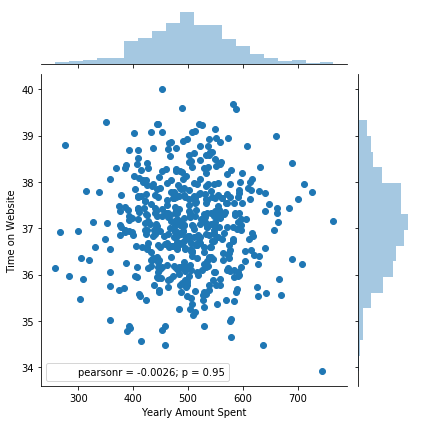

In [64]:
sns.jointplot(x="Yearly Amount Spent", y="Time on Website", data=cust)

In [65]:
# no obvious correlation with time on website vs yearly spent.

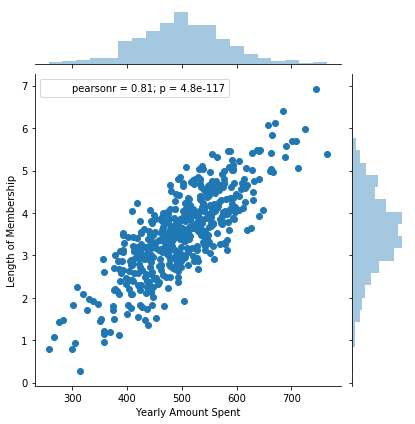

In [66]:
sns.jointplot(x="Yearly Amount Spent", y="Length of Membership", data=cust)

In [67]:
# nice correlation in length of membership and yearly amount spent

### iv. Make a summary plot of feature relationships using pairplot function of Seaborn

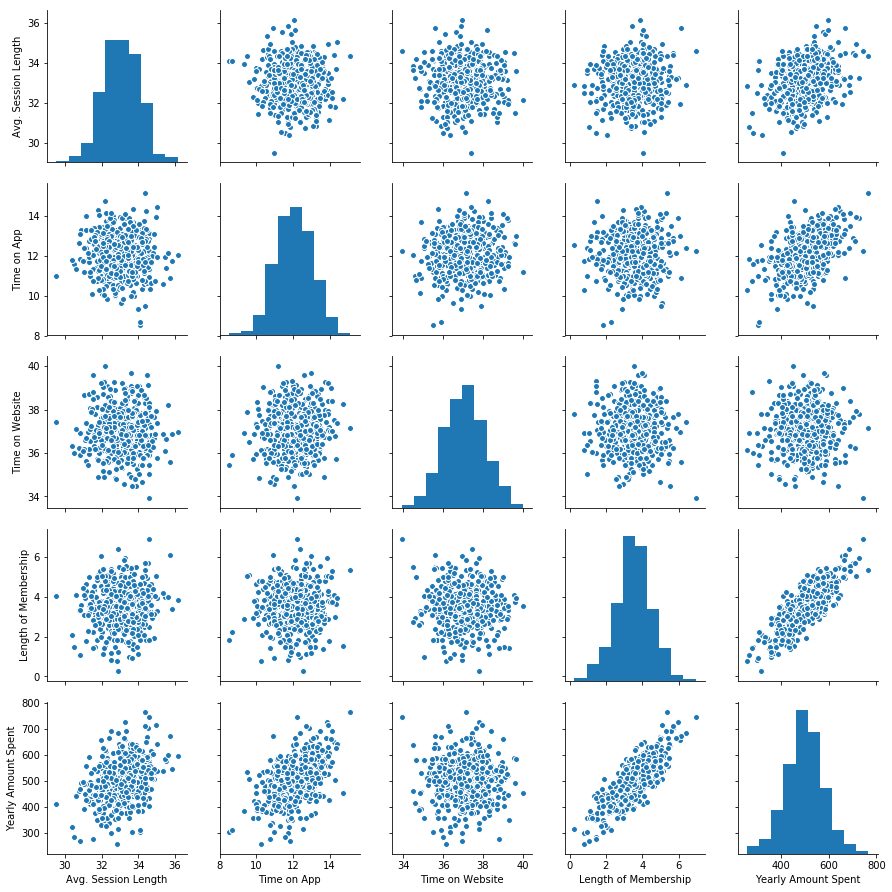

In [68]:
sns.pairplot(data=cust)

In [69]:
# from review: create a linear model plot using seaborn's lmplot of yearly sepnt vs length of membership

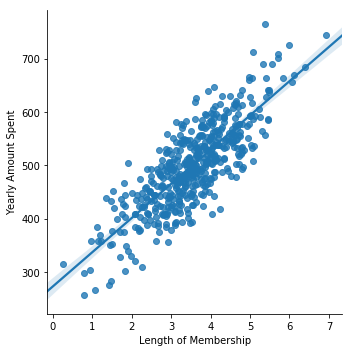

In [70]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=cust)

### v. Create two dataframes: one for the target variable ("Yearly Amount Spent"), the other - containing all the rest of numerical features

In [71]:
y = cust['Yearly Amount Spent']

In [72]:
x = cust[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [73]:
# import sklearn from above train_test_split.  sklearn is the machine learning package, train_test_split splits out data for train and test

In [74]:
yearly_spent = pd.DataFrame(cust['Yearly Amount Spent'])
yearly_spent.head()

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


In [75]:
numerical_features = pd.DataFrame(cust[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']])
numerical_features.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


### vi. Split the data into a training and test sets. Make a test set size 0.3 and random seed 123 (so the results are consistent for all students) 

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [77]:
x_test.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
229,33.946241,10.983977,37.951489,3.050713
337,31.827979,12.461147,37.428997,2.974737
327,31.128090,13.278956,37.387181,4.626075
416,33.454302,11.016756,37.637311,4.137000
306,31.912076,11.792972,36.257819,2.395168


In [78]:
x_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
211,34.081646,12.104542,36.059646,3.974522
52,34.187775,10.320116,37.453405,2.094892
178,32.635878,12.178573,35.674256,4.131755
336,32.302553,11.979061,38.269061,3.532862
201,34.007212,12.494323,36.045459,4.330714


### vii. Fit a regression model on the training set 

In [79]:
# Train the model -import from sklearn.linear_model import LinearRegression

In [80]:
# create an instance of LinearRegression() model named lm.
lm = LinearRegression()

In [81]:
# train  and fit the training data
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### viii. Print out the coefficients of the model

In [82]:
coefficients = lm.coef_
print('Coefficients: {}'.format(coefficients))

Coefficients: [25.36266491 38.82367921  0.80356799 61.54905291]


In [83]:
# Create linear regression object
#coefs_lin = poly.polyfit(x_train['Length of Membership'], y_train, 1)
#coefs_sqr = poly.polyfit(x_train['Length of Membership'], y_train, 2)
#coefs_ten = poly.polyfit(x_train['Length of Membership'], y_train, 11)
#regr = linear_model.LinearRegression()


#coefs_lin

### ix. Make a prediction of the target variable from features dataframe

In [84]:
model_predictions = lm.predict( x_test)
model_predictions

array([451.45513477, 449.98346006, 565.58747222, 506.85835416,
       389.56231985, 585.03296693, 637.59847957, 479.02513157,
       313.01963279, 395.48240626, 433.80362537, 598.14535354,
       512.18982503, 448.47866297, 337.48820806, 513.1664785 ,
       507.78812146, 421.60398092, 575.84745818, 558.99891782,
       445.47771735, 477.99111015, 473.96795183, 620.08135036,
       481.32162732, 407.36979023, 539.85569296, 544.60999023,
       538.78719696, 450.84097468, 475.24640533, 548.04887657,
       542.89281792, 349.95108984, 573.57160693, 429.83028002,
       500.81598286, 340.90802397, 489.44359967, 577.18579843,
       522.69564852, 441.42678032, 571.22593783, 500.22814601,
       472.84395232, 507.95808236, 451.74707908, 570.18050045,
       702.95737754, 619.05480248, 457.74742989, 481.43502295,
       560.93191708, 641.58662538, 531.60569994, 500.44046143,
       615.41710836, 692.42531891, 493.23976233, 456.87524809,
       381.65050835, 432.81706447, 456.97121528, 457.95

In [85]:
# from review, Boris created a scatterplot to test real values vs predicted values

Text(0,0.5,'predicted y')

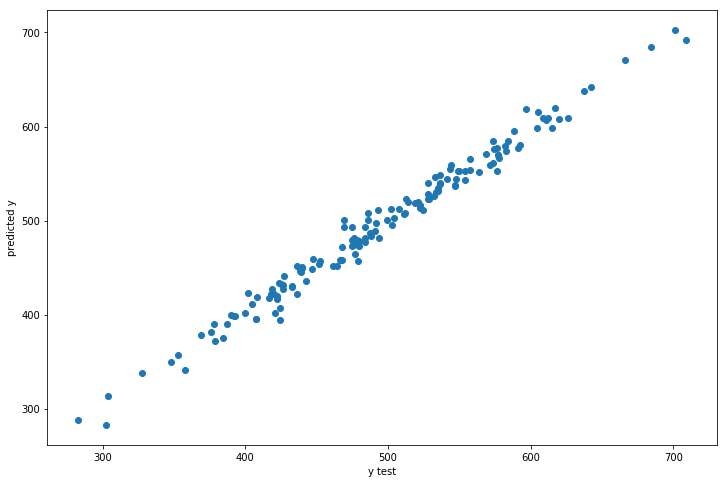

In [86]:
plt.scatter(y_test,model_predictions)
plt.xlabel('y test')
plt.ylabel('predicted y')

### x. Calculate the Mean Squared Error (using sklearn.metrics module)
#### from sklearn import metrics

In [87]:
#mse = mean_squared_error(y_train, y_pred)
#print("Mean squared error: %.2F" % mse)
# above does not work

In [88]:
mae_skl = metrics.mean_absolute_error(y_test,model_predictions)
print('mae => {}'.format(mae_skl))

mae => 7.988079194245098


In [89]:
mse_skl = metrics.mean_squared_error(y_test,model_predictions)
print('mse => {}'.format(mse_skl))

mse => 102.72313941866021


In [90]:
rmse_skl = np.sqrt(metrics.mean_squared_error(y_test,model_predictions))
print('rmse => {}'.format(rmse_skl))

rmse => 10.13524244498671


In [91]:
print('mae => {}'.format(mae_skl))
print('mse => {}'.format(mse_skl))
print('rmse => {}'.format(rmse_skl))

mae => 7.988079194245098
mse => 102.72313941866021
rmse => 10.13524244498671


### xi.Using Seaborn distplot show the histogram of the residuals - differences between the target variable and predicted target variable 

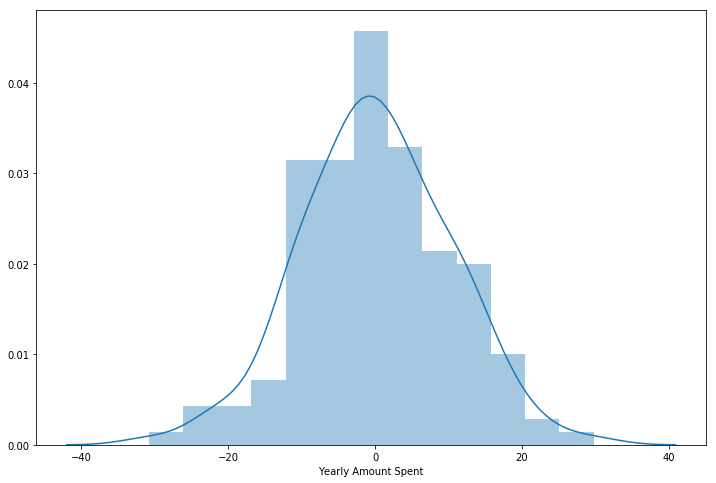

In [92]:
sns.distplot(y_test-model_predictions)

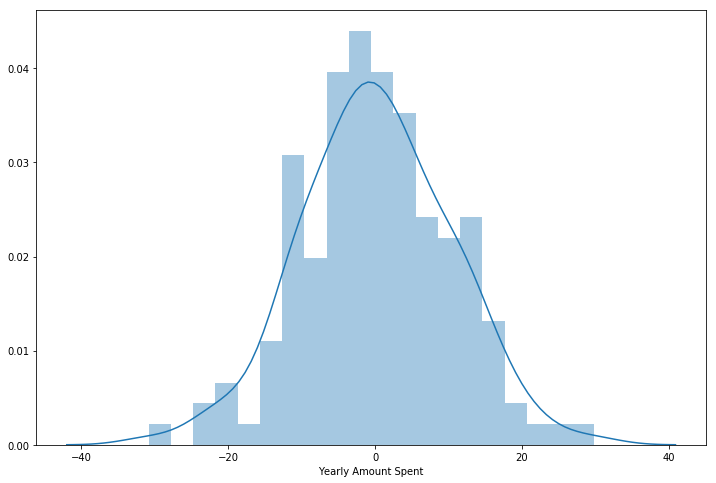

In [93]:
# add bins to clarify
sns.distplot((y_test-model_predictions),bins=20)

### xii. Answer the main question: How should we allocate the engineering budget between website development and app development?
#### Hint: look at the regression coefficients and contemplate their meaning

In [95]:
coefficients_df = pd.DataFrame(lm.coef_,x.columns)
coefficients_df.columns = ['Coeffecient']
coefficients_df

,Coeffecient
Avg. Session Length,25.362665
Time on App,38.823679
Time on Website,0.803568
Length of Membership,61.549053


In [ ]:
# People spend more time on the web app than the website by a huge margin.
# The website might be so poorly designed that it is not useful, or so well designed it is super efficient.
# further information is needed.